In [1]:

import sys
PYTHON_PATHS = ['../evo']
for path in PYTHON_PATHS:
    if path not in sys.path:
        sys.path.append(path)

from evo.core import metrics

In [2]:


from evo.tools import log
log.configure_logging(verbose=True, debug=True, silent=False)

import pprint
import numpy as np

from evo.tools import plot
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook

# temporarily override some package settings
from evo.tools.settings import SETTINGS
SETTINGS.plot_usetex = False

[DEBUG][2022-03-19 16:03:20,569][log.configure_logging():112]
System info:
Python 3.9.7
Linux-5.13.0-35-generic-x86_64-with-glibc2.31
alena@alena-ps



In [77]:
def save_trajectories(seq, model):
    if model=='gan':
        model_name = 'Proposed'
    if model=='hist':
        model_name='HistEq'
    if model=='gamma2':
        model_name = 'Gamma2'
    if model=='gamma4':
        model_name = 'Gamma2'
    if model =='orig':
        model_name='Original'
    
    
    save_filename = f'pngs/{seq}/{model}.png'
    ref_file = f"trajectories/transformed/{seq}_gt.txt"
    est_file = f"trajectories/processed/{seq}/{seq}_{model}.txt"
    
    from evo.tools import file_interface
    traj_ref = file_interface.read_tum_trajectory_file(ref_file)
    traj_est = file_interface.read_tum_trajectory_file(est_file)
    
#     from evo.core import sync
#     max_diff = 0.01
#     traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)
    
#     import copy

#     traj_est_aligned = copy.deepcopy(traj_est)
#     traj_est_aligned.align(traj_ref, correct_scale=True, correct_only_scale=False)
    
    fig = plt.figure(figsize=(6,6))
    traj_by_label = {
        #"estimate (not aligned)": traj_est,
        "ground truth trajectory": traj_ref,
        f"ORB-SLAM3 trajectory on {model_name}": traj_est
    }
    plot.trajectories(fig, traj_by_label, plot.PlotMode.xz)
    plt.show()
    plt.savefig(save_filename)

<IPython.core.display.Javascript object>


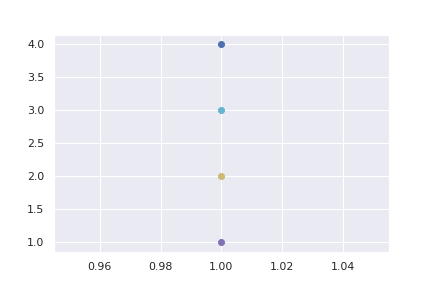

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)


In [61]:
fig, ax = plt.subplots()
print(next(ax._get_lines.prop_cycler)['color'])
print(next(ax._get_lines.prop_cycler)['color'])
print(next(ax._get_lines.prop_cycler)['color'])
plt.scatter([1], [1], color=next(ax._get_lines.prop_cycler)['color'])
plt.scatter([1], [2], color=next(ax._get_lines.prop_cycler)['color'])
plt.scatter([1], [3], color=next(ax._get_lines.prop_cycler)['color'])
plt.scatter([1], [4], color=next(ax._get_lines.prop_cycler)['color'])
plt.show()

In [62]:
# file_interface.write_tum_trajectory_file()

[DEBUG][2022-03-19 16:32:12,050][file_interface.read_tum_trajectory_file():117]
Loaded 9993 stamps and poses from: trajectories/transformed/11_gt.txt
[DEBUG][2022-03-19 16:32:12,060][file_interface.read_tum_trajectory_file():117]
Loaded 1075 stamps and poses from: trajectories/processed/11/11_orig.txt


<IPython.core.display.Javascript object>


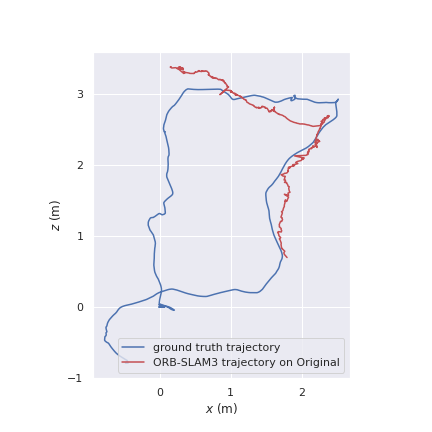

[DEBUG][2022-03-19 16:32:12,187][file_interface.read_tum_trajectory_file():117]
Loaded 9993 stamps and poses from: trajectories/transformed/11_gt.txt
[DEBUG][2022-03-19 16:32:12,197][file_interface.read_tum_trajectory_file():117]
Loaded 1075 stamps and poses from: trajectories/processed/11/11_hist.txt


<IPython.core.display.Javascript object>


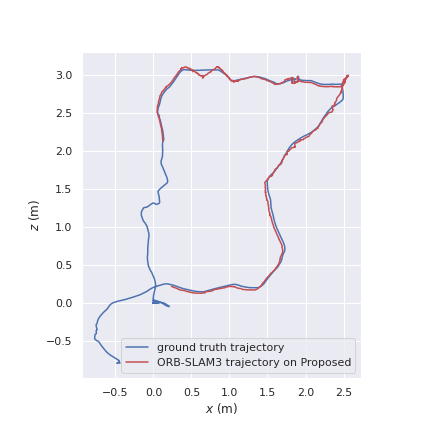

[DEBUG][2022-03-19 16:32:12,328][file_interface.read_tum_trajectory_file():117]
Loaded 9993 stamps and poses from: trajectories/transformed/11_gt.txt
[DEBUG][2022-03-19 16:32:12,338][file_interface.read_tum_trajectory_file():117]
Loaded 1075 stamps and poses from: trajectories/processed/11/11_gan.txt


<IPython.core.display.Javascript object>


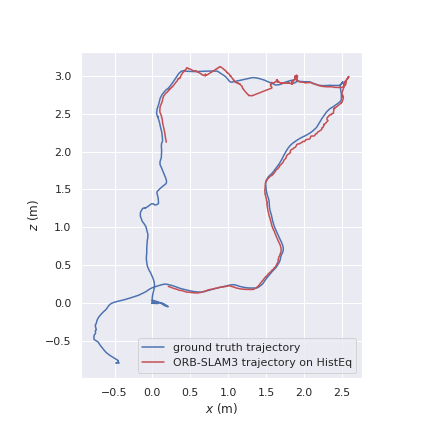

[DEBUG][2022-03-19 16:32:12,472][file_interface.read_tum_trajectory_file():117]
Loaded 9993 stamps and poses from: trajectories/transformed/11_gt.txt
[DEBUG][2022-03-19 16:32:12,482][file_interface.read_tum_trajectory_file():117]
Loaded 1101 stamps and poses from: trajectories/processed/11/11_gamma2.txt


<IPython.core.display.Javascript object>


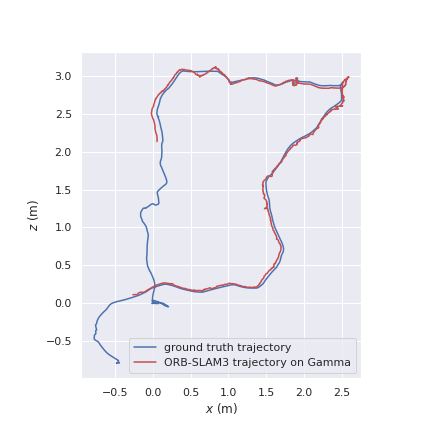

[DEBUG][2022-03-19 16:32:12,621][file_interface.read_tum_trajectory_file():117]
Loaded 9993 stamps and poses from: trajectories/transformed/11_gt.txt
[DEBUG][2022-03-19 16:32:12,630][file_interface.read_tum_trajectory_file():117]
Loaded 1075 stamps and poses from: trajectories/processed/11/11_gamma4.txt


<IPython.core.display.Javascript object>


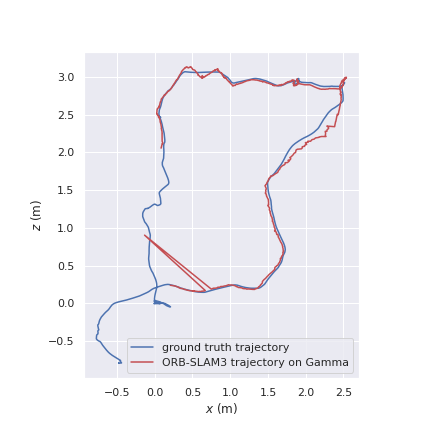

In [79]:
for model in ["orig", "hist", "gan", "gamma2", "gamma4"]:
    try:
        save_trajectories('11', model)
    except:
        print("No model ", model)

In [31]:
# dt = 0.8
# times = traj_est.timestamps
# start = None
# if len(times)>2:
#     for i in range(len(times)-1):
#         if times[i+1] - times[i] < dt:
#             start = times[i]
#             break
#     else:
#         pass
# else:
#     pass
# traj_est.reduce_to_time_range(start_timestamp=start)

In [82]:
73/12

6.083333333333333

In [32]:
from evo.core import sync
max_diff = 0.01
traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

[DEBUG][2021-12-10 22:01:33,052][sync.associate_trajectories():110]
Found 1147 of max. 1147 possible matching timestamps between...
	first trajectory
and:	second trajectory
..with max. time diff.: 0.01 (s) and time offset: 0.0 (s).


In [22]:
import copy

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=True, correct_only_scale=False)

[DEBUG][2021-12-10 22:00:53,336][trajectory.align():200]
Aligning using Umeyama's method... (with scale correction)
[DEBUG][2021-12-10 22:00:53,351][trajectory.align():212]
Rotation of alignment:
[[ 0.62588478 -0.77461072  0.09081007]
 [ 0.02862685 -0.09354044 -0.99520384]
 [ 0.77938998  0.62548255 -0.03637087]]
Translation of alignment:
[-2.12188972 -0.10641707 -1.53785757]
[DEBUG][2021-12-10 22:00:53,352][trajectory.align():214]
Scale correction: 9.956282640687073


(array([[ 0.62588478, -0.77461072,  0.09081007],
        [ 0.02862685, -0.09354044, -0.99520384],
        [ 0.77938998,  0.62548255, -0.03637087]]),
 array([-2.12188972, -0.10641707, -1.53785757]),
 9.956282640687073)

In [23]:
# import pandas as pd

# xr, yr, zr = [traj_ref.positions_xyz[:, 0], traj_ref.positions_xyz[:, 1], traj_ref.positions_xyz[:, 2]]
# xe, ye, ze = [traj_est_aligned.positions_xyz[:, 0]*4, traj_est_aligned.positions_xyz[:, 1]*4, traj_est_aligned.positions_xyz[:, 2]*4]

# A = pd.DataFrame({'X': xr, 'Y':yr, 'Z':zr,  'color':['a']*zr.shape[0]})
# # A = A.transpose()
# # n = A.columns

# B = pd.DataFrame({'X': xe, 'Y':ye, 'Z':ze, 'color':['b']*ze.shape[0]})
# # B = B.transpose()
# C = A.append(B)

In [24]:
# import plotly.express as px

# fig = px.line_3d(C, x='X', y='Y', z='Z', color='color')
# fig.show()

In [25]:
# import copy

# traj_est_aligned = copy.deepcopy(traj_est)
# traj_est_aligned.align(traj_ref, correct_scale=True, correct_only_scale=False)

[DEBUG][2021-12-10 22:00:54,314][trajectory.align():200]
Aligning using Umeyama's method... (with scale correction)
[DEBUG][2021-12-10 22:00:54,325][trajectory.align():212]
Rotation of alignment:
[[ 0.62588478 -0.77461072  0.09081007]
 [ 0.02862685 -0.09354044 -0.99520384]
 [ 0.77938998  0.62548255 -0.03637087]]
Translation of alignment:
[-2.12188972 -0.10641707 -1.53785757]
[DEBUG][2021-12-10 22:00:54,326][trajectory.align():214]
Scale correction: 9.956282640687073


(array([[ 0.62588478, -0.77461072,  0.09081007],
        [ 0.02862685, -0.09354044, -0.99520384],
        [ 0.77938998,  0.62548255, -0.03637087]]),
 array([-2.12188972, -0.10641707, -1.53785757]),
 9.956282640687073)

In [26]:
# len(traj_est_aligned.timestamps)

In [27]:
# from scipy.spatial.transform import Rotation as R

# i = 0
# pose = traj_est_aligned
# T = pose.poses_se3[i]

# print(T)
# print('------------------------')
# r = R.from_matrix(T[:3, :3])

# print('ts: ', pose.timestamps[i])
# print('trans: ', T[:3, 3])
# print('qs: ', r.as_quat())

In [28]:
len(traj_est_aligned.positions_xyz)

1738

# END FOR EVGENY

<IPython.core.display.Javascript object>


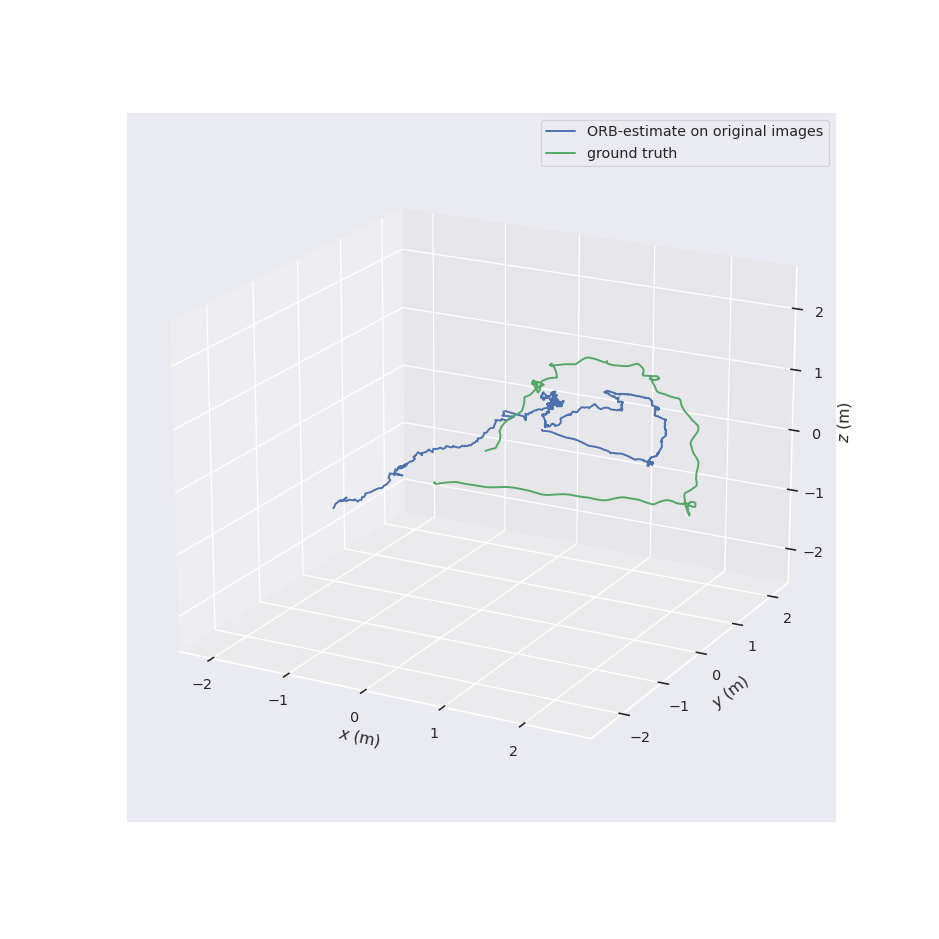

In [29]:
fig = plt.figure(figsize=(10,10))
traj_by_label = {
    #"estimate (not aligned)": traj_est,
    "ORB-estimate on original images": traj_est_aligned,
    "ground truth": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()
plt.savefig('pngs/12/GAN.png')

# ATE

In [136]:
pose_relation = metrics.PoseRelation.translation_part
use_aligned_trajectories = True

In [137]:


if use_aligned_trajectories:
    data = (traj_ref, traj_est_aligned) 
else:
    data = (traj_ref, traj_est)



In [138]:
ape_metric = metrics.APE(pose_relation)
ape_metric.process_data(data)

[DEBUG][2021-12-08 19:29:20,889][metrics.process_data():389]
Compared 1694 absolute pose pairs.
[DEBUG][2021-12-08 19:29:20,891][metrics.process_data():390]
Calculating APE for translation part pose relation...


In [139]:
ape_stat = ape_metric.get_statistic(metrics.StatisticsType.rmse)
print(ape_stat)

0.1034447586690906


In [129]:
ape_stats = ape_metric.get_all_statistics()
pprint.pprint(ape_stats)

{'max': 0.3961432427628448,
 'mean': 0.0837475784407723,
 'median': 0.06547713203364539,
 'min': 0.006343479743755026,
 'rmse': 0.10330397855837804,
 'sse': 17.971162984406877,
 'std': 0.06048185753841001}


<IPython.core.display.Javascript object>


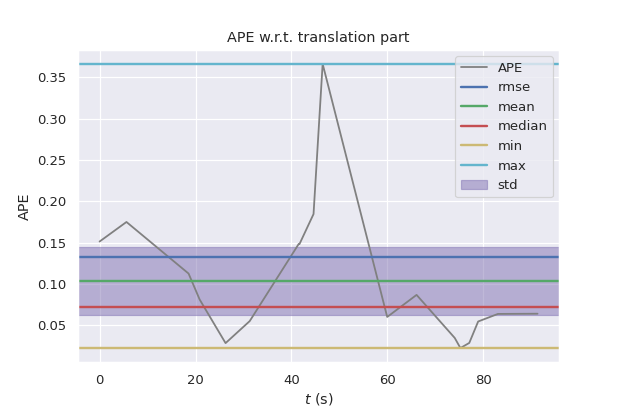

In [28]:
seconds_from_start = [t - traj_est.timestamps[0] for t in traj_est.timestamps]
fig = plt.figure()
plot.error_array(fig.gca(), ape_metric.error, x_array=seconds_from_start,
                 statistics={s:v for s,v in ape_stats.items() if s != "sse"},
                 name="APE", title="APE w.r.t. " + ape_metric.pose_relation.value, xlabel="$t$ (s)")
plt.show()

<IPython.core.display.Javascript object>


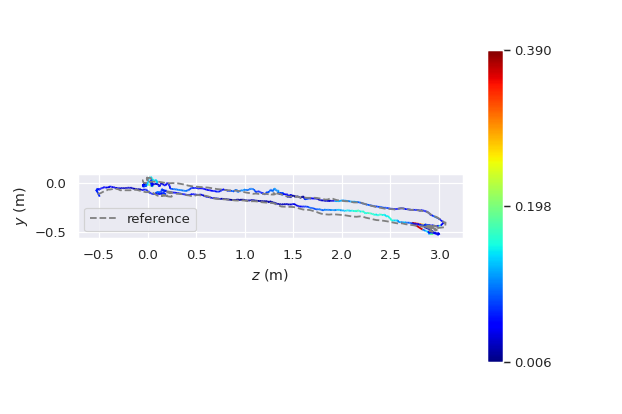

In [18]:
plot_mode = plot.PlotMode.zy
fig = plt.figure()
ax = plot.prepare_axis(fig, plot_mode)
plot.traj(ax, plot_mode, traj_ref, '--', "gray", "reference")
plot.traj_colormap(ax, traj_est_aligned if use_aligned_trajectories else traj_est, ape_metric.error, 
                   plot_mode, min_map=ape_stats["min"], max_map=ape_stats["max"])
ax.legend()
plt.show()